# Preliminary Analysis and Deliverable 2

**Introduction**

In this preliminary analysis, we are going to focus on the shape of data regarding the race difference.
We are going to examine the disparity between different race.

**Question to be answered:**

Has this disparity changed over time and, if so, in what way?

- Visualize the change in number of articles, conference proceedings, grants, and patents over time by gender and by race

**Initial Exploration**

1. Data visualization of all faculties we have in number of articles, conference proceedings, grants, and patents by race;
2. Data visualization of number of articles, conference proceedings, grants, and patents between departments.


**Import Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Preliminary Analysis on Race

In [5]:
df = pd.read_csv("/Users/jennywong/Documents/Senior I 2021 Fall/CS506/final_proj/CS506_private/data_important/faculties_gender_race.csv")
df.head(2)

,Id,Name,LastName,FirstName,Gender,RankName,Department,TotalArticleCount,TotalConfProcCount,TotalGrantCount,TotalPatentCount,TotalCourseCount,Race
0,1485,"BALAKRISHNAN, HAMSA",BALAKRISHNAN,HAMSA,Male,Professor,Aeronautics and Astronautics,46,63,15,1,2,PCTAPI
1,2030,"BARRETT, STEVEN R. H",BARRETT,STEVEN,Male,Associate,Aeronautics and Astronautics,87,7,11,1,2,PCTWHITE


In [6]:
race_type = df['Race'].unique()
race_type

array(['PCTAPI', 'PCTWHITE', 'PCTHISPANIC', 'PCTBLACK'], dtype=object)

In [7]:
x = df['Race'].value_counts()
x

PCTWHITE       624
PCTAPI         107
PCTHISPANIC     15
PCTBLACK         3
Name: Race, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of People in Race')

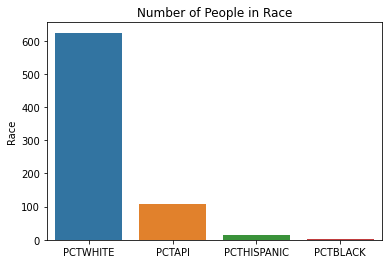

In [10]:
sns.barplot(x.index,x).set_title("Number of People in Race")

**Patent by Race**

In [ ]:
df_Patent_count = df.groupby('Race')['TotalPatentCount'].sum()
df_Patent_count

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Race', ylabel='TotalPatentCount'>

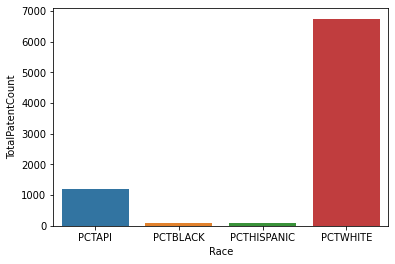

In [12]:
sns.barplot(df_Patent_count.index,df_Patent_count)

**Article by Race**

In [14]:
df_Article_count = df.groupby('Race')['TotalArticleCount'].sum()
df_Article_count

Race
PCTAPI         15239
PCTBLACK         216
PCTHISPANIC     1484
PCTWHITE       74925
Name: TotalArticleCount, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Race', ylabel='TotalArticleCount'>

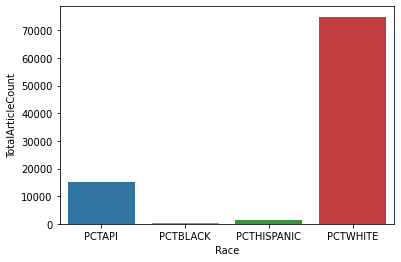

In [15]:
sns.barplot(df_Article_count.index,df_Article_count)

**Conference Proceeding by Race**

In [16]:
df_Conf_count = df.groupby('Race')['TotalConfProcCount'].sum()
df_Conf_count

Race
PCTAPI          3605
PCTBLACK         432
PCTHISPANIC      557
PCTWHITE       15491
Name: TotalConfProcCount, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Race', ylabel='TotalConfProcCount'>

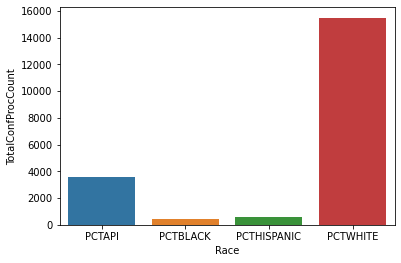

In [17]:
sns.barplot(df_Conf_count.index,df_Conf_count)

**Grant by Race**

In [18]:
df_Grant_count = df.groupby('Race')['TotalGrantCount'].sum()
df_Grant_count

Race
PCTAPI         1374
PCTBLACK         66
PCTHISPANIC     217
PCTWHITE       9121
Name: TotalGrantCount, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Race', ylabel='TotalGrantCount'>

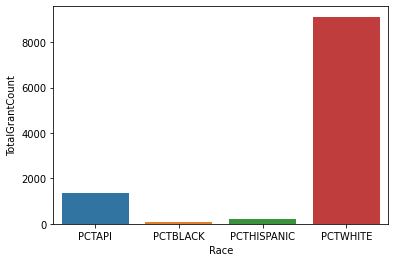

In [19]:
sns.barplot(df_Grant_count.index,df_Grant_count)

**Preliminary Summary Data by Race**

In [21]:
z=df[['Department','Race','Gender']]
df_dp_count = pd.DataFrame(z.groupby(['Department','Race','Gender']).size())
df_dp_count

0
Department                   Race        Gender    
Aeronautics and Astronautics PCTAPI      Female   6
                                         Male     1
                             PCTHISPANIC Male     3
                             PCTWHITE    Female  14
                                         Male    27
...                                              ..
Physics                      PCTAPI      Male     3
                             PCTHISPANIC Female   1
                                         Male     1
                             PCTWHITE    Female  37
                                         Male    52

[64 rows x 1 columns]

### Disparity Over Time

In [22]:
df = pd.read_csv("/Users/jennywong/Documents/Senior I 2021 Fall/CS506/final_proj/CS506_private/data_important/gender_year.csv")
df.head(2)

,Name,Department_x,Year,ArticleCount,ConfProcCount,GrantCount,PatentCount,Id,Gender
0,"BALAKRISHNAN, HAMSA",Aeronautics and Astronautics,2004,2.0,5.0,0.0,0.0,1485,Male
1,"BALAKRISHNAN, HAMSA",Aeronautics and Astronautics,2005,0.0,1.0,0.0,0.0,1485,Male


In [33]:
dg=df.drop(columns=['Name','Department_x','ConfProcCount','ArticleCount','PatentCount','Id']).sort_values(by=['Year'])
dg = dg.iloc[1: -1, :]
dg = dg[dg.Year != 'No Issue']
dg = dg.iloc[: -1, :]
dg

,Year,GrantCount,Gender
20459,1900,0.0,Male
20957,1917,0.0,Female
553,1958,0.0,Female
19782,1959,0.0,Female
19783,1960,0.0,Female
...,...,...,...
13628,2021,0.0,Male
10738,2021,0.0,Female
10205,2021,0.0,Male
10739,2021,0.0,Female


In [45]:
dh=dg.groupby(["Year", "Gender"])["GrantCount"].sum()
dk=dh.reset_index(name = 'GrantCount')
dp = dk[dk["GrantCount"] > 10]
dp.head(2)

,Year,Gender,GrantCount
19,1979,Male,28.0
39,1990,Male,17.0


In [51]:
dConf=df.drop(columns=['Name','Department_x','GrantCount','ArticleCount','PatentCount','Id'])
dconf=dConf.groupby(["Year", "Gender"])["ConfProcCount"].sum()
dc=dconf.reset_index(name = 'ConfProcCount')
dC=dc[dc["ConfProcCount"] > 0]
dC.head(2)

,Year,Gender,ConfProcCount
15,1976,Male,1.0
17,1977,Male,1.0


In [53]:
d_article=df.drop(columns=['Name','Department_x','ConfProcCount','GrantCount','PatentCount','Id'])
da=d_article.groupby(["Year", "Gender"])["ArticleCount"].sum().reset_index(name = 'ArticleCount')
dA=da[da["ArticleCount"] > 80]
dA.head(2)

,Year,Gender,ArticleCount
64,2001,Male,111.0
66,2002,Male,136.0


In [55]:
d_patent=df.drop(columns=['Name','Department_x','ConfProcCount','GrantCount','ArticleCount','Id'])
dP=d_patent.groupby(["Year", "Gender"])["PatentCount"].sum().reset_index(name = 'PatentCount')
dpa=dP[dP["PatentCount"] > 30]
dpa.head(2)

,Year,Gender,PatentCount
26,1983,Male,57.0
28,1984,Male,32.0


**Patent by gender over time**

Text(0.5, 1.0, 'Patent Count by Gender between 1983-2021')

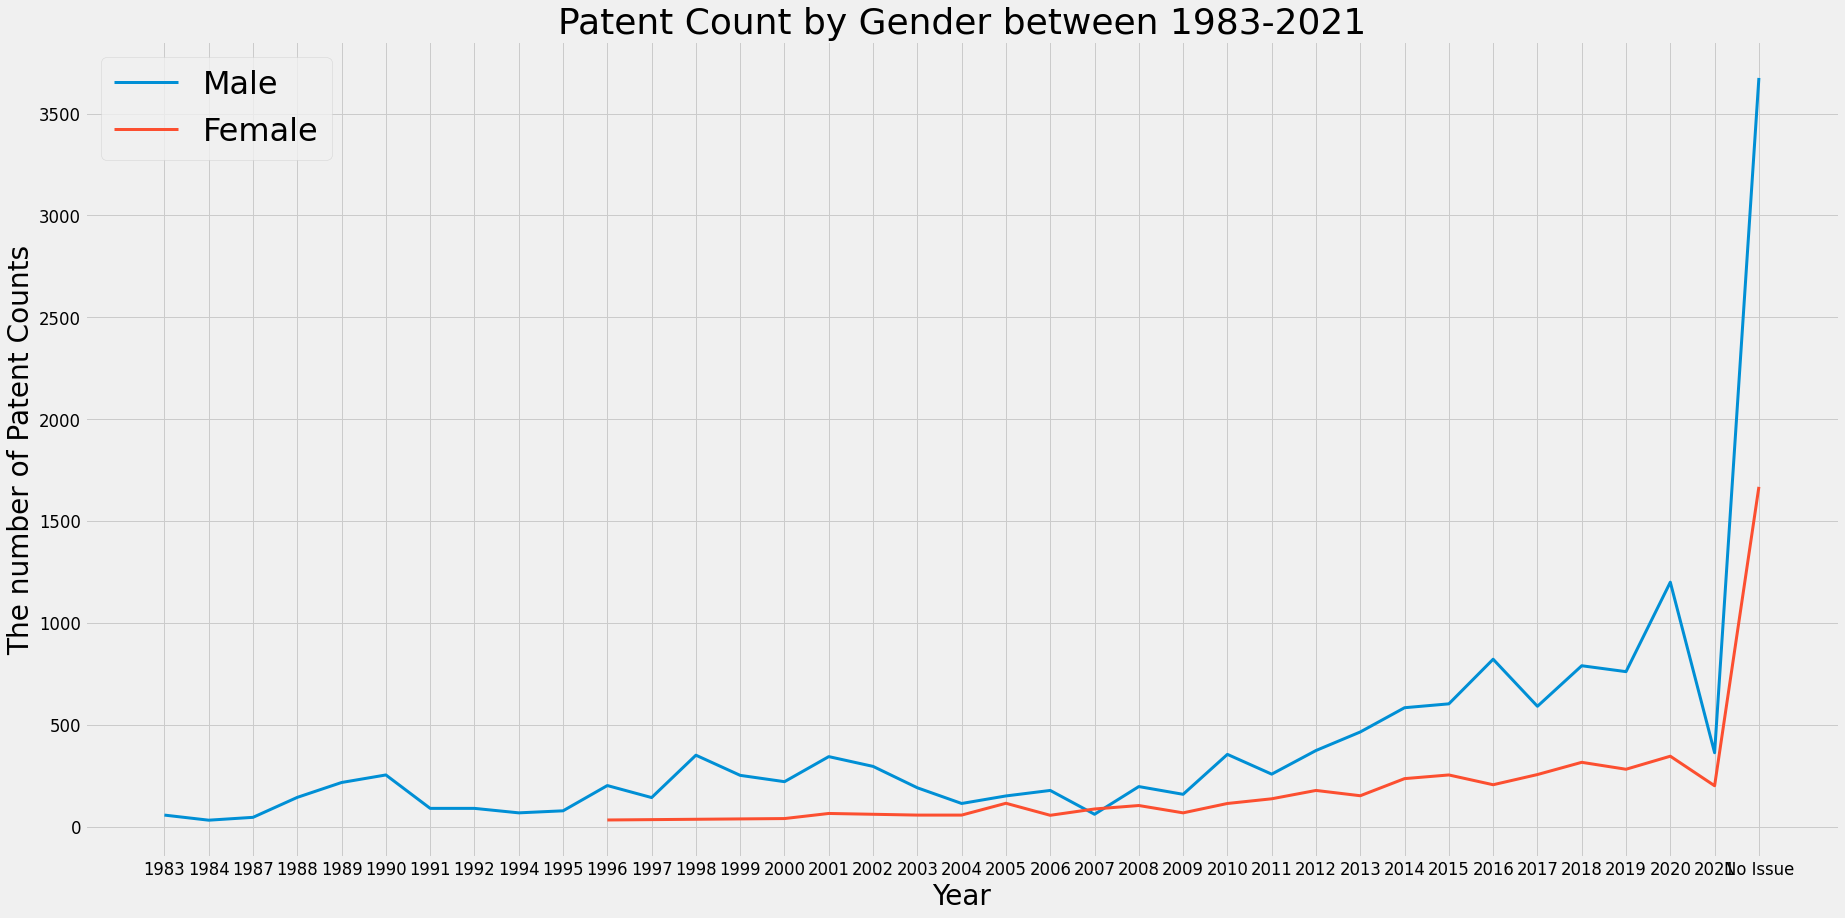

In [57]:
fig,ax = plt.subplots(figsize=(28,14))
plt.style.use('fast')

for gender in ['Male','Female']:
    ax.plot(dpa[dpa.Gender==gender].Year, dpa[dpa.Gender==gender].PatentCount,label=gender,linewidth=3.0)

ax.set_xlabel("Year",fontsize=28)
ax.set_ylabel("The number of Patent Counts",fontsize=28)
ax.legend(loc='best',fontsize=32)
ax.xaxis.set_tick_params(labelsize=16.5)
ax.yaxis.set_tick_params(labelsize=16.5)
ax.set_title("Patent Count by Gender between 1983-2021", fontsize=36)

The patent count dataset shows the male count leads higher than the female count, except 2007.
However, due to covid-19, many researchers worked at home, instead of research labs, so the count decreases a little.

**Article by gender over time**

Text(0.5, 1.0, 'Article Count by Gender between 2001-2021')

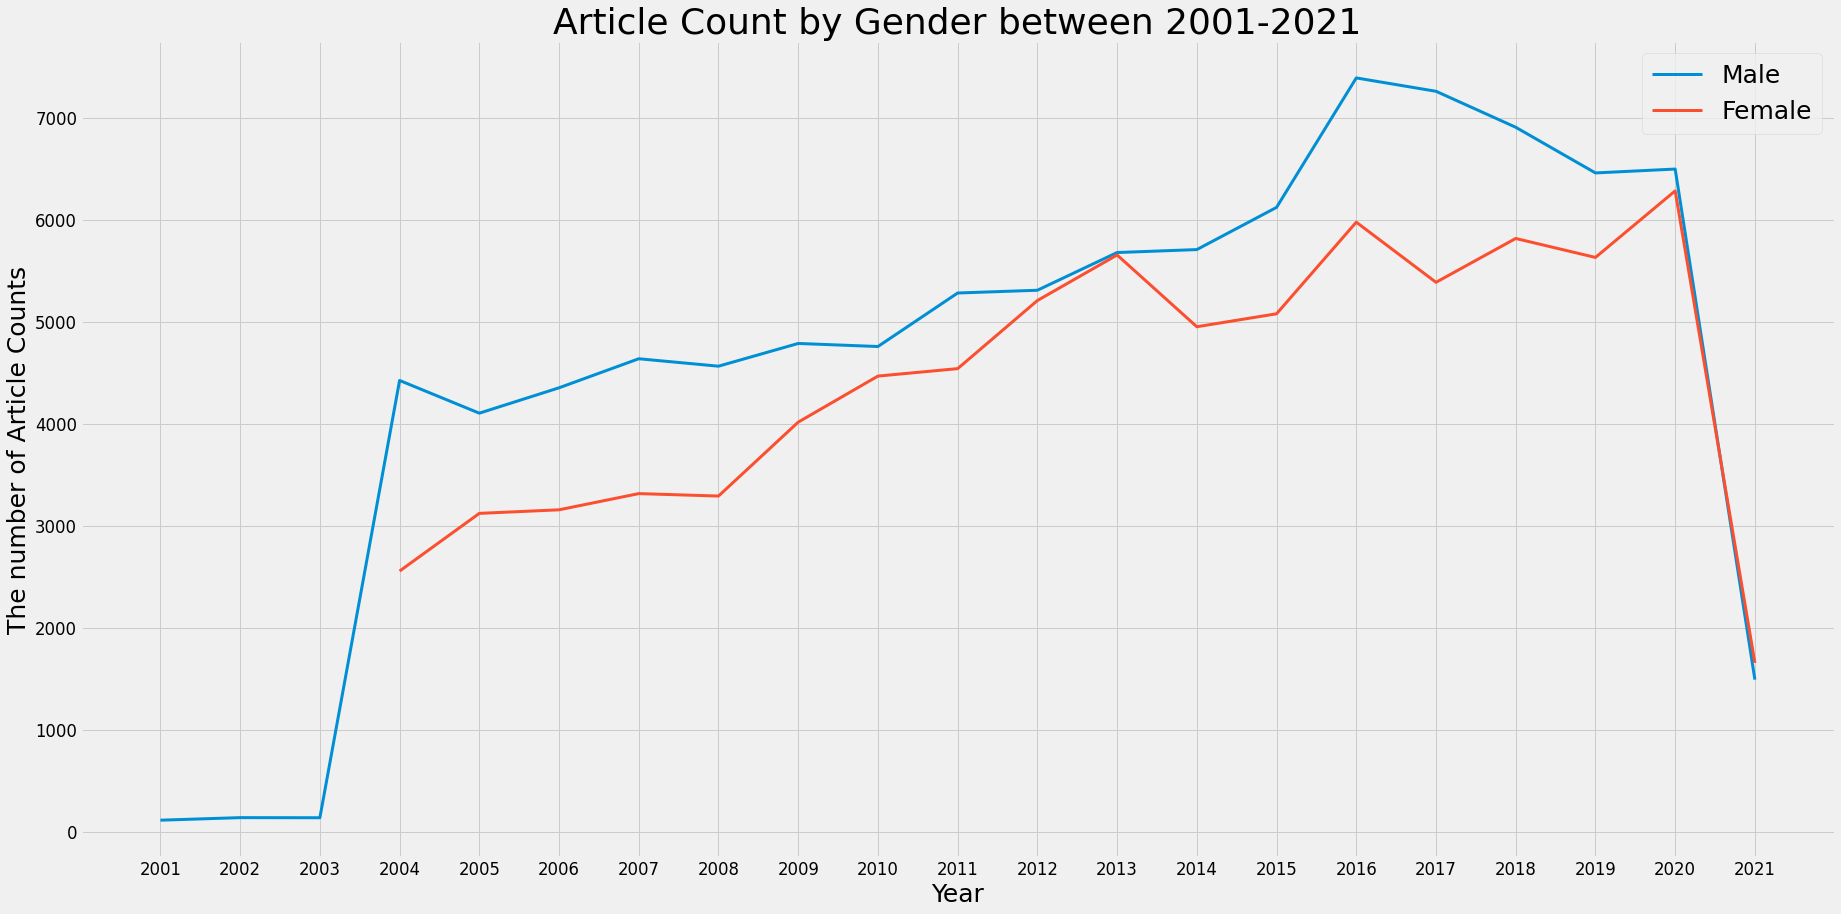

In [58]:
fig,ax = plt.subplots(figsize=(28,14))
plt.style.use('fivethirtyeight')

for gender in ['Male','Female']:
    ax.plot(dA[dA.Gender==gender].Year, dA[dA.Gender==gender].ArticleCount,label=gender,linewidth=3.0)

ax.set_xlabel("Year",fontsize=25)
ax.set_ylabel("The number of Article Counts",fontsize=25)
ax.legend(loc='best',fontsize=25)
ax.xaxis.set_tick_params(labelsize=16.5)
ax.yaxis.set_tick_params(labelsize=16.5)
ax.set_title("Article Count by Gender between 2001-2021", fontsize=36)

The article count dataset shows the male count is 1000 bigger than the female count, except 2012-2013.
However, due to covid-19, many universities are closed, so the count decreases dramatically.

**Conference Proceeding by gender over time**

Text(0.5, 1.0, 'Conference Publications Count by Gender between 1976-2021')

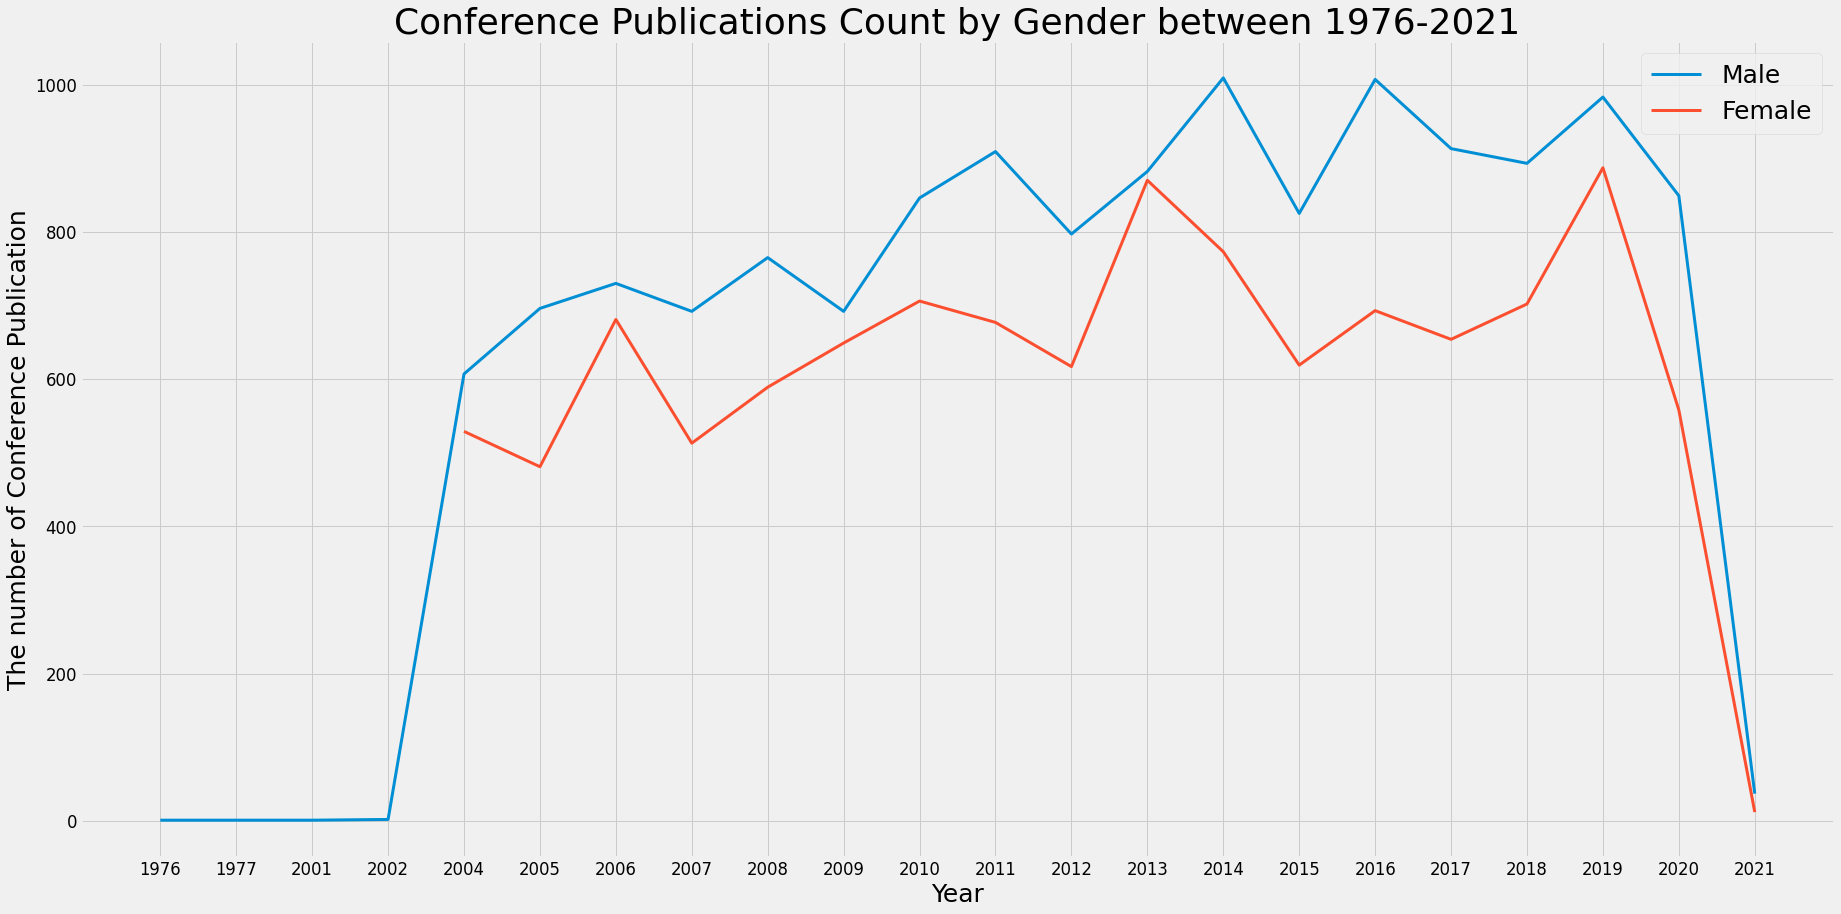

In [59]:
fig,ax = plt.subplots(figsize=(28,14))
plt.style.use('fivethirtyeight')

for gender in ['Male','Female']:
    ax.plot(dC[dC.Gender==gender].Year,dC[dC.Gender==gender].ConfProcCount,label=gender,linewidth=3.0)

ax.set_xlabel("Year",fontsize=25)
ax.set_ylabel("The number of Conference Publication",fontsize=25)
ax.legend(loc='best',fontsize=25)
ax.xaxis.set_tick_params(labelsize=16.5)
ax.yaxis.set_tick_params(labelsize=16.5)
ax.set_title("Conference Publications Count by Gender between 1976-2021", fontsize=36)

The conference publications dataset collected the most recent decade data, which shows the total number remains
in a range between 400 and 600. The male count is a little bigger than the female count.
However, due to covid-19, many conferences are cancelled, so the count decreases dramatically.

**Grant Count by gender over time**

Text(0.5, 1.0, 'Grant Count by Gender in Timeseries')

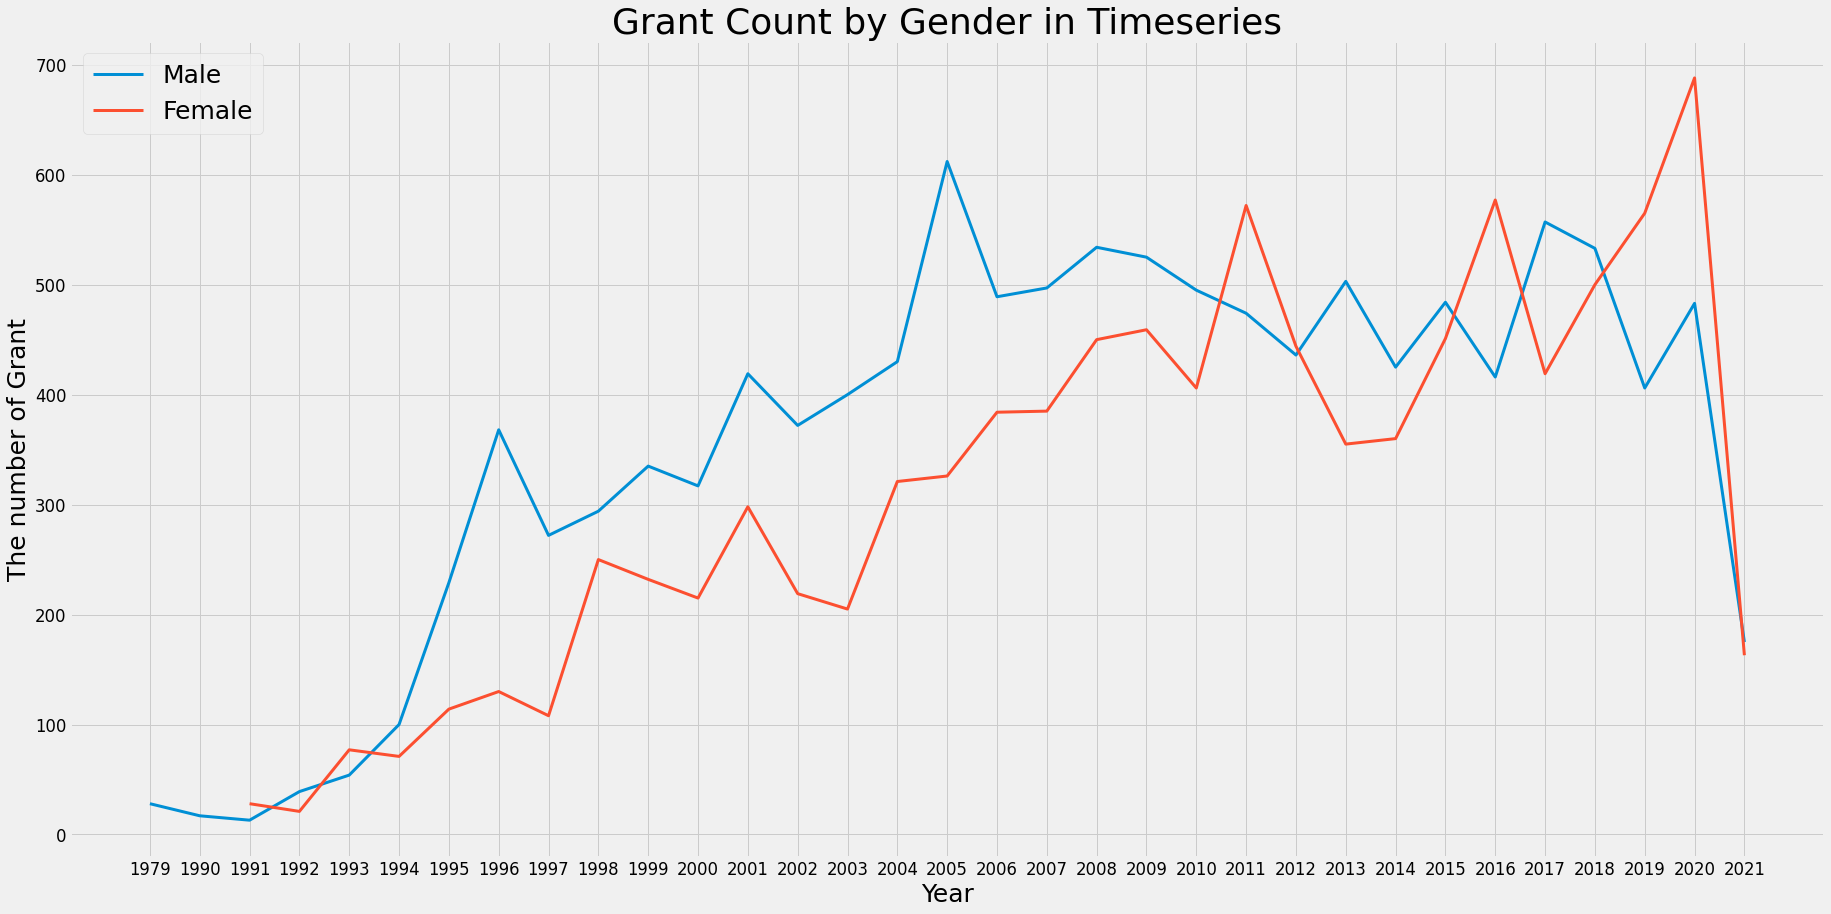

In [60]:
fig,ax = plt.subplots(figsize=(28,14))

for gender in ['Male','Female']:
    ax.plot(dp[dp.Gender==gender].Year,dp[dp.Gender==gender].GrantCount,label=gender,linewidth=3.0)

ax.set_xlabel("Year",fontsize=25)
ax.set_ylabel("The number of Grant",fontsize=25)
ax.legend(loc='best',fontsize=25)
ax.xaxis.set_tick_params(labelsize=16.5)
ax.yaxis.set_tick_params(labelsize=16.5)
ax.set_title("Grant Count by Gender in Timeseries", fontsize=36)

From the above figure, we can find that the total number of grant increases as time goes.
That's because we entered into an electronic era in the 21st century.
Beginning 2010, the grant from female researchers will sometimes be bigger than the male grants.